## Running the Models

### Loading the required packages

In [2]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from pandas import DataFrame
from IPython.display import HTML
%matplotlib inline

### Viewing a sample of the dataset and features

In [3]:
lend = pd.read_csv('/Users/dennisvasquez/Downloads/aug2018lend.csv')

In [6]:
lend = lend.drop('Unnamed: 0' , axis=1);

In [7]:
lend.head(5)

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,...,log_bc_open_to_buy,log_delinq_amnt,log_total_bal_ex_mort,log_total_il_high_credit_limit,log_annual_inc,log_tot_cur_bal,log_revol_bal,log_total_rev_hi_lim,log_total_bc_limit,status_group
0,28000,7.62%,325000.0,18.55,0,1.0,15,0,29581,54.6,...,9.539716,0.0,12.204767,12.189364,12.691580,13.591857,10.294888,10.900436,10.650176,0
1,15000,14.47%,98000.0,6.15,0,2.0,16,0,5749,22.3,...,9.619200,0.0,9.475623,8.922658,11.492723,9.475623,8.656781,10.158130,9.942708,0
2,12000,13.53%,40000.0,16.94,0,0.0,7,2,5572,68.8,...,7.264030,0.0,9.518193,9.213336,10.596635,9.518193,8.625509,8.999619,8.853665,0
3,12000,6.62%,105000.0,14.05,0,1.0,12,0,13168,21.6,...,10.582333,0.0,10.659680,10.663569,11.561716,12.497420,9.485545,11.020267,10.870471,0
4,20800,13.53%,81500.0,16.73,0,2.0,29,0,23473,54.5,...,8.826294,0.0,10.063606,0.000000,11.308358,10.063606,10.063606,10.671278,9.615805,0


In [8]:
lend.shape

(400489, 65)

In [53]:
lend_features = [
#'loan_amnt',
#'grade', # lending club loan grade
#'int_rate',
#'home_ownership',
'annual_inc',
#'loan_status',
'dti',
'delinq_2yrs', # 30dpd delinquencies from past 2 years
#'inq_last_6mths', # inquiries since past 6 months
'open_acc', # number of open credit lines on file
#'pub_rec', # number of derogatory public records
'revol_util',
'revol_bal',
'total_acc', # total number of credit lines currently on file
#'last_credit_pull_d', # recent month lendinclub pulled credit
##'collections_12_mths_ex_med', # number of collections in 12 months excluding medical collections
##'acc_now_delinq',
'log_tot_cur_bal',
'total_rev_hi_lim',
'acc_open_past_24mths',
'log_avg_cur_bal',
'bc_open_to_buy', # total open-to-buy on revolving bankcards
'bc_util', # ratio of current balance to credit limit for all bankcard accounts
##'chargeoff_within_12_mths',
##'delinq_amnt',
'mo_sin_old_il_acct', # months since oldest installment account was opened
'mo_sin_old_rev_tl_op',
'mo_sin_rcnt_rev_tl_op',
'mo_sin_rcnt_tl', # months since most recent account was opened
'mort_acc', # number of mortgage accounts
'mths_since_recent_bc', # months since recent bankcard account was opened
'mths_since_recent_inq',
'num_accts_ever_120_pd',
'num_actv_bc_tl',
'num_actv_rev_tl',
'num_bc_sats', # number of satisfactory bankcard accounts
'num_bc_tl', # number of bankcard accounts
'num_il_tl',
'num_op_rev_tl',
'num_rev_accts',
'num_rev_tl_bal_gt_0', # number of revolving trades with balance >0
'num_sats',
'num_tl_120dpd_2m', # number of accounts currently 120 dpd
'num_tl_30dpd',
'num_tl_90g_dpd_24m',
'num_tl_op_past_12m',
'pct_tl_nvr_dlq', # percent of trades never delinquent
'percent_bc_gt_75', # percent of all bankcard accounts >75%
'pub_rec_bankruptcies',
'tax_liens',
'tot_hi_cred_lim',
'total_bal_ex_mort',
#'total_bc_limit',
'log_total_bc_limit',
'total_il_high_credit_limit',
]

X = lend[lend_features]
y = lend.status_group

### Splitting and scaling the training and testing dataset

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

### Importing the Logistic Regression Model and tune parameters

In [55]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept=True, penalty='l1', C=10)

In [56]:
logreg.fit(X_train_scale, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Coefficients and corresponding features

In [57]:
coef = pd.DataFrame({'coefficients': logreg.coef_[0],'features': X.columns})
print(coef)

    coefficients                    features
0       0.082464                  annual_inc
1       0.361388                         dti
2       0.138188                 delinq_2yrs
3      -0.028601                    open_acc
4       0.081361                  revol_util
5      -0.004543                   revol_bal
6      -0.047845                   total_acc
7      -0.274500             log_tot_cur_bal
8      -0.075051            total_rev_hi_lim
9       0.173123        acc_open_past_24mths
10      0.151521             log_avg_cur_bal
11     -0.055587              bc_open_to_buy
12     -0.086356                     bc_util
13      0.015389          mo_sin_old_il_acct
14     -0.021385        mo_sin_old_rev_tl_op
15      0.012182       mo_sin_rcnt_rev_tl_op
16     -0.025938              mo_sin_rcnt_tl
17     -0.075326                    mort_acc
18     -0.059234        mths_since_recent_bc
19     -0.100989       mths_since_recent_inq
20      0.029245       num_accts_ever_120_pd
21      0.

In [58]:
coef_ord = coef.coefficients.sort_values(ascending=False)
coef_ord

28    0.451124
39    0.382664
1     0.361388
9     0.173123
10    0.151521
2     0.138188
23    0.129493
35    0.127904
29    0.110199
0     0.082464
4     0.081361
33    0.063029
37    0.039923
21    0.034538
20    0.029245
31    0.020304
36    0.019333
13    0.015389
15    0.012182
30    0.004730
27   -0.000878
5    -0.004543
14   -0.021385
16   -0.025938
3    -0.028601
34   -0.031986
32   -0.044868
6    -0.047845
11   -0.055587
18   -0.059234
25   -0.062509
26   -0.073817
8    -0.075051
17   -0.075326
38   -0.076325
12   -0.086356
19   -0.100989
40   -0.136781
24   -0.151287
7    -0.274500
41   -0.369982
22   -0.378808
Name: coefficients, dtype: float64

### Printing the Intercept

In [59]:
print(logreg.intercept_)

[-1.10027271]


### Storing the predicted results

In [60]:
y_pred_class = logreg.predict(X_test_scale)

### Scoring the majority of the results

In [61]:
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))

0.7360646404921946


In [18]:
%%time

from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X, y, scoring='accuracy', cv=5)
print('CV Accuracy {}, Average Accuracy {}'.format(scores, scores.mean()))

CV Accuracy [0.73415398 0.73680071 0.73870432 0.73701886 0.73514614], Average Accuracy 0.736364802903
CPU times: user 3min 49s, sys: 4.74 s, total: 3min 54s
Wall time: 3min 55s


### The baseline null accuracy score, or dataset split

In [19]:
# 35.98% are defaulted loans
print("Baseline Null Accuracy Score:")
print(lend.status_group.value_counts())

Baseline Null Accuracy Score:
0    293802
1    106687
Name: status_group, dtype: int64


### Confusion Matrix and Recall results

In [62]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred_class)
print(confusion)

[[71892  1446]
 [24980  1805]]


 - TN: 71,892 = we predicted no they're not defaults (will perform good), and they were not defaults (performed good).
 - FP: 1,446 = we predicted yes they are defaults (will perform bad), but they were not actual defaults (performed good) (Type I error).
 - FN: 24,980 = we predicted no they're not defaults (will perform good), and they were defaults (they performed bad) (Type II error).
 - TP: 1,805 = we predicted yes they are defaults (will perform bad), and they were actual defaults (performed bad).

Specificity: When it's actually not a default, how often does it predict a non-default? TN/actual no

Recall or Sensitivity: When it's actually a default, how often does it predict a default? TP/actual yes

Precision: When it predicts a default, how often is it correct? TP/predicted yes

F1 Score = 2*((precision x sensitivity)/(precision + sensitivity))

In [63]:
# print the first 25 true and predicted responses
from __future__ import print_function
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class, target_names=["non-default", "default"]))

             precision    recall  f1-score   support

non-default       0.74      0.98      0.84     73338
    default       0.56      0.07      0.12     26785

avg / total       0.69      0.74      0.65    100123



### AUC curve score

In [65]:
from sklearn.metrics import roc_auc_score
logreg_auc = roc_auc_score(y_test, logreg.predict_proba(X_test_scale)[:, 1])
print("AUC for Logistic Regression: {:.3f}".format(logreg_auc))

AUC for Logistic Regression: 0.662


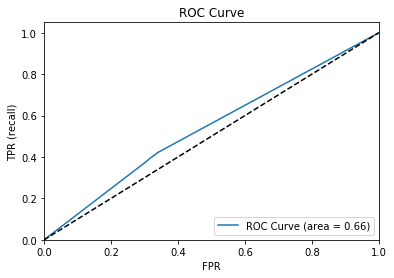

In [66]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % logreg_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

### Importing the Random Forests Clasifier Model and tuning parameters

In [46]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y)

rf = RandomForestClassifier(n_estimators = 100, max_features='sqrt', class_weight="balanced")

In [47]:
%%time

rf.fit(X_train, y_train)

CPU times: user 3min 44s, sys: 4.75 s, total: 3min 49s
Wall time: 4min 1s


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

### Drawing the Feature Importance list

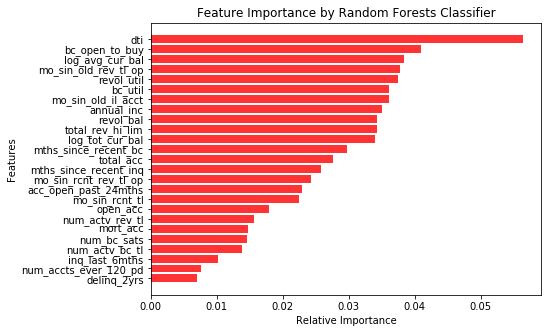

In [48]:
importance_list = rf.feature_importances_
name_list = X_train.columns
importance_list, name_list = zip(*sorted(zip(importance_list[:25], name_list[:25])))

plt.figure(figsize=(7, 5))
plt.barh(range(len(name_list)),importance_list,align='center', color = 'red', alpha = 0.8)
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importance by Random Forests Classifier');

### Scoring the Random Forests model

In [49]:
%%time

from sklearn.model_selection import cross_val_score
#scores = cross_val_score(rf, X, y, scoring='accuracy')
print('CV Accuracy {}, Average Accuracy {}'.format(scores, scores.mean()))

#for n_trees in range(1, 100, 25):
    #model = RandomForestClassifier(n_estimators = n_trees)
    #scores = cross_val_score(model, X, y, scoring='accuracy')
    #print('n trees: {}, CV accuracy {}, Average accuracy {}'.format(n_trees, scores, scores.mean()))

CV Accuracy [0.73415398 0.73680071 0.73870432 0.73701886 0.73514614], Average Accuracy 0.736364802903
CPU times: user 1.26 ms, sys: 1.17 ms, total: 2.42 ms
Wall time: 2.84 ms


### Confusion Matrix and Recall results

In [50]:
confusion = confusion_matrix(y_test, y_pred_class)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[70899  2471]
 [25823   930]]


In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_class, target_names=["non-default", "default"]))

             precision    recall  f1-score   support

non-default       0.73      0.97      0.83     73370
    default       0.27      0.03      0.06     26753

avg / total       0.61      0.72      0.63    100123



### AUC curve score

In [52]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
print("AUC for Random Forests: {:.3f}".format(rf_auc))

AUC for Random Forests: 0.652
